In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os
import json
from scipy import stats as scs

# to make your graphics crisp on high-resolution screens
%config InlineBackend.figure_format = 'retina'

(lecture by Brandon Martin-Anderson, Jan 2019)

### Pre-lecture pep talk: data science and play

In the first few weeks of the course we bombard you with a scatter shot of instruction on tools. It's a lot. Python, bash, git, numpy, pandas, sql; the shock from back-to-back web scraping and concurrency is especially rough. And then, in the middle of the second week, we give you a lecture on high-school-level probability. What gives?

There's an ongoing debate among data scientists about what "data science" means. Most tersely: it's programming plus statistics; data science as a field is an interdisciplinary practice and data scientists serve as interdisciplinary bridges. In practice, a data scientist gets embedded in a team of programmers to serve as a statistical specialist, or gets embedded with statisticians to serve as a programming specialist.

I'm 36. I'm old enough to try to say wise stuff but young enough to be forgiven for being wrong. It's a good spot of making grand statements. So here's mine, about what "data science" means:

Data science is the application of the principles of play to applied mathematics. It sprung out of nowhere apparently overnight as soon as there existed an ecosystem of applied mathematics tools that support a workflow that is exploratory, improvisational, real-time, and collaborative. Python has a read-evaluate-print loop; notebooks let you try out ideas before you commit them to a script; numpy and pandas and matplotlib let you see your data in real time; git lets you work with others.

The combined experience is one where you can have an idea and *share* the *fruit* of that idea in a very short time. The tiny iterations you can make through this process; these little loops constitute the fundamental behavior of **play** - a basic instict so important and powerful that it's shared by every animal with a neocortex (i.e., mammals and birds). Trying stuff without knowing exactly what we're doing or how is **fundamental** to exploring and discovering our abilities.

That's why we're giving you **these** tools, and then dumping you back into the realm of elementary mathematics. The first time around, in high school, you were exposed to basic mathematics and then told, "Some day, if you're judged worthy, you will be given the opportunity to ask your boss to form a committee to explore the possibility of setting up a process for implementing a carefully designed system based partially on these principles." The path between knowledge and action, we were led to believe, was lengthy and formal.

It turns out this was merely a result of the limitations imposed by rare and expensive and clumsy tools. We were told how to fly, but we didn't get access to any airplanes. Good news - this stack - Python and numpy and pandas and sql and mongo and all the ways they mix together - **is your airplane**. This new toolchain liberates the underlying mathematical material into the realm of play. We needed a new word for this way of working with math, so we called it "data science".

I felt an instinctual excitement over the past 10 years as I saw this tool ecosystem starting to pull together. I was never very good at math, but I was always very excited **about** math. I saw its promise, but the easy fluency that came to my calculus classmates never came to me. I think it was because I was trying to play with it; trying to tinker and poke and apply it intuitively instead of formally. (I found out way too late that this is how *most* people in higher math interact with math; alas, not in undergraduate engineering courses.) 

Recently a friend of mine looked at my projects and said, "you're a data scientist", and I said, "what's data science?" and he said, "what you're doing." It turns out businesses find it useful, and people will pay to learn what I was doing, and teaching sounded fun, so I signed up to teach this "data science" thing.

You're mostly here because you want jobs, and I'm able to be here because there's a market for that, and I'm proud to be a part of that process. But I have a secret goal, which is to encourage you to use mathematical play in a computational setting to make things that make people think and interact with ideas. In other words, to make **art**.

# Hypothesis Testing
### or: how to figure out what's real

"Hypothesis Testing" is a body of strategies for interrogating beliefs given data. We'll discuss the broad philosophy and specific quantitative techniques for testing hypotheses.

By the end of this lecture you should be able to:
* Identify a null, alternative hypothesis
* Interpet a p-value
* Use a z-score to get a p-value
* Use the central limit theorem to get a p-value
* Identify a few statistical tests
* Design a simple experiment
* Avoid common pitfalls like multiple testing, repeated significance checks

If you're very familiar with these principles, you should be able to:
* Contrast hypothesis testing with parameter estimation
* Identify a Type I, Type II error
* Describe the Student's t-test

## Glossary

(consider sticking this on the board)

This lecture uses a large number of *very* similar terms.

#### Population
 * A random variable. Every item that exists and may exist; potentially uncountable.
 * $\mu$: population mean.
 * $\sigma$, $\sigma^2$: population standard deviation, population variance.
 * $\hat{\mu}$, $\hat{\sigma}$: population mean estimate, population std estimate.
 
#### Sample
 * A countable subset of the population
 * $\bar{\mu}$, sometimes $\bar{x}$: sample mean
 * $\bar{\sigma}$: sample standard deviation
 
#### Sampling Distribution of sample means
 * A random variable. The population of sample means.
 * $\mu_M$: mean of sample means
 * $\sigma_M$, $\sigma_M^2$: std of sample means (sometimes called "standard error of the mean"); variance of sample means.


## Broad description; an example

Broadly, the strategy for hypothesis testing is:
1. Identify your current belief
2. Identify the level of surprise that would make you doubt that belief
3. Collect data.
 * If it is very surprising, consider modifying your belief.
 * If it is not, just stick with your belief.
 
### Example 1: The shape of the Earth

1. The earth is round
2. 1:100 chance? 1:1000? 1:million? 1:billion? There has to be *something*.
3. Collect data.
 * Sun angles at different points on the world at the same time
 * Circularity of lunar eclipse shadow
 * Amount of far-away ship occluded by horizon
 
Given the imprecision with which you collected your data, what is the chance that the world is *not* round?



### Example 2: The weight of Brandon

1. Previous assumption: I weigh 200.0 lbs.
2. How surprising would data have to be? 1 in 20? 1 in 5?
3. Collect data.
 * Stand on a scale: shows 199.8 lbs. Does this fail to validate our assumption?
 * If it shows 196.0 lbs. Does this fail to validate our assumption?
 
### Two takeaways
* This approach is **very** flexible.
* This approach will **cannot** give you a new hypothesis.
 * All you can do is cast a vote of no-confidence on your standing assumption.

## The gears of hypothesis testing

Before we proceed, some terminology:

* The **Null Hypothesis $H_0$**
 * A statement of the status quo; "no change in belief", "the standing assumption".
 * e.g. "the Earth is round", "Brandon weighs 200 lbs"
* The **Alternative Hypothesis $H_1$**
 * Anything other than the null hypothesis, $\neg H_0$
 * e.g., "the Earth is not round", "Brandon does not weigh 200 lbs"
* The **level of significance $\alpha$**
 * The level of surprise required to reject the null hypothesis.
 * **Always pick this before starting the experiment**
  * $\alpha=0.05$ is pretty normal for "publishable".
 * Small numbers are more surprising. $\alpha=0.05$ means "one in 20", $\alpha=0.001$ means "one in a thousand".
* The **p-value**
 * The chance that the null hypothesis generated the observed data.

## Back to the Brandon example

Let's apply these concepts to the Brandon example.

For the sake of this example, imagine that I read the manual for my scale and it says: 

```This scale presents a measurement which is a sum of your weight plus gaussian noise with a mean of 0 and a standard deviation of 0.2 lbs.```

Assuming I weigh exactly 200.0 lbs, the probability distribution of scale measurements should look like:

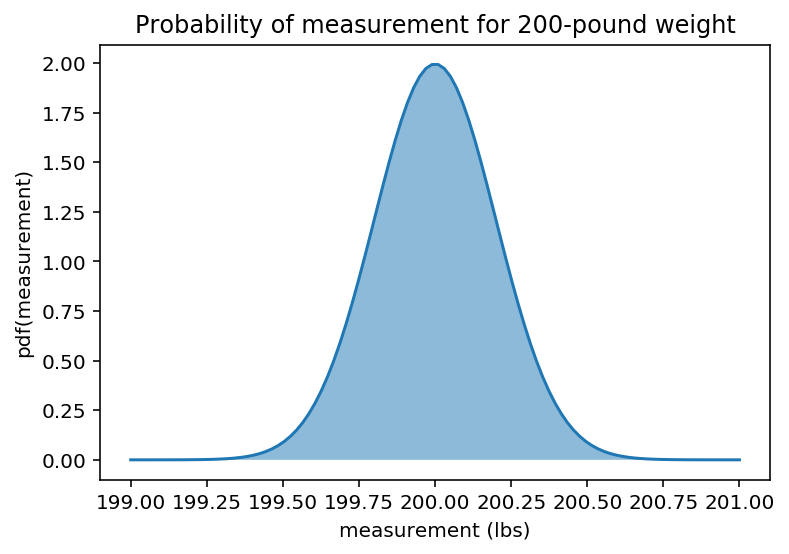

In [2]:
scalereadout = scs.norm(loc=200, scale=0.2)

weight = np.linspace(199, 201, num=100)
p_readout = scalereadout.pdf(weight)

plt.fill_between(weight, 0, p_readout, alpha=0.5)
plt.plot( weight, p_readout )
plt.title("Probability of measurement for 200-pound weight")
plt.xlabel("measurement (lbs)")
plt.ylabel("pdf(measurement)")
plt.show()

* $H_0$: Brandon weighs 200.0 pounds.
* $H_0$: Brandon does **not** weight 200.0 pounds.
* $\alpha$: let's say 0.05; other numbers might make sense
* measurement: 199.8 lb.

Challenge now: find the **p-value**. Find the chance that we'd see our data, assuming $H_0$.

**question to class**
What does the graph tell us is the chance of seeing a measurement of 199.8?


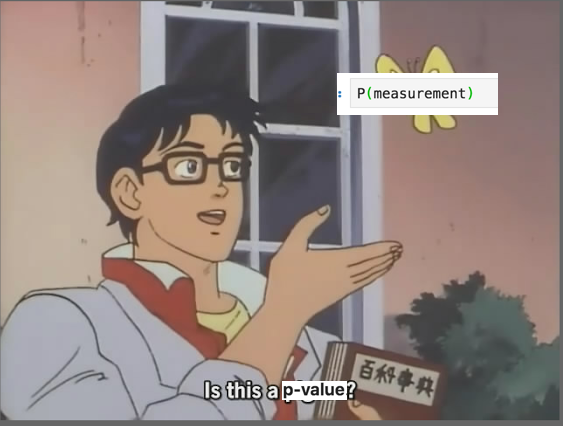

In [3]:
from IPython.display import Image
Image("img/isthis.png")

The chance of seeing precisely that value is **exactly 0**. That's not helpful. 

What is the chance of getting a measurement $199.8 \pm 0.01$?

In [4]:
# this is a demonstration of the wrong thing to do
epsilon = 0.01
low = 199.8 - epsilon
high = 199.8 + epsilon
scalereadout.cdf( high ) - scalereadout.cdf(low)

0.024197069932565263

Now we have a non-zero p-value, but the $\epsilon=0.01$ is arbitrary.

## Going to extremes

Get a meaningful answer, we can't ask about the probability of seeing a measurement - we have to ask about the probability of **seeing a measurement as extreme as our observation**.

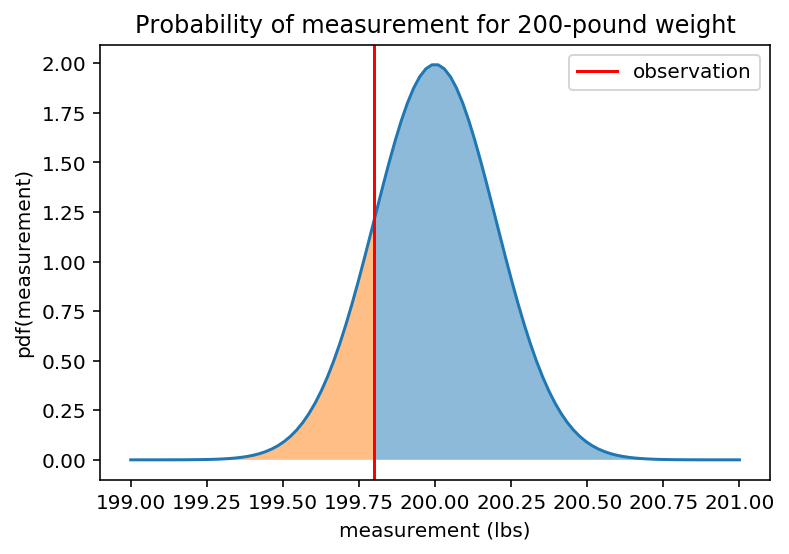

In [5]:
obs = 199.8

scalereadout = scs.norm(loc=200, scale=0.2)

weight = np.linspace(199, 201, num=100)
p_readout = scalereadout.pdf(weight)

plt.plot( weight, p_readout )
plt.title("Probability of measurement for 200-pound weight")
plt.xlabel("measurement (lbs)")
plt.ylabel("pdf(measurement)")
plt.axvline(x=obs, c="red", label="observation")

weight = np.linspace(obs, 201, num=100)
p_readout = scalereadout.pdf(weight)
plt.fill_between(weight, 0, p_readout, alpha=0.5)

weight = np.linspace(199, obs, num=100)
p_readout = scalereadout.pdf(weight)
plt.fill_between(weight, 0, p_readout, alpha=0.5)

plt.legend()

plt.show()

The area under the curve from $[-\infty, x]$ is the CDF; each distribution in `scipy` provides this function.

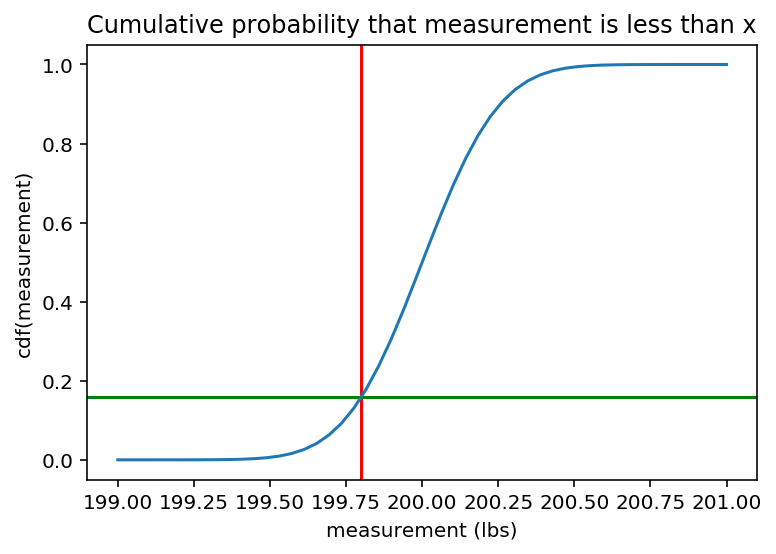

In [6]:
weight = np.linspace(199,201)
p_obs = scalereadout.cdf(weight)

plt.axvline(x=obs, c="red", label="observation")
plt.axhline(y=scalereadout.cdf(obs), c="green")

plt.title("Cumulative probability that measurement is less than x")
plt.plot(weight, p_obs)
plt.xlabel("measurement (lbs)")
plt.ylabel("cdf(measurement)")

plt.show()

In [7]:
p_less_than = scalereadout.cdf(obs)
print(p_less_than)

0.15865525393147079


The probability that a measurement is less than or equal to 199.8 is about 0.16; should that be our p-value?

**Not so fast.**

The p-value is the probability of encountering a measurement this or more extreme generated in a world where the null hypothesis holds.

Our null hypothesis: Brandon is exactly 200.0 pounds.

In fact, the probability of encountering a measurement this extreme, assuming this $H_0$, is **twice** `p_less_than`, because extremes can occur on either side.

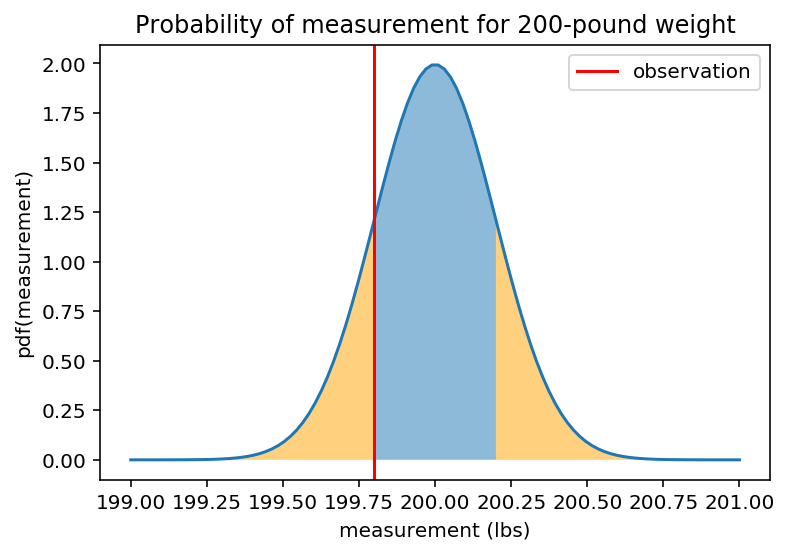

In [8]:
obs = 199.8

scalereadout = scs.norm(loc=200, scale=0.2)

weight = np.linspace(199, 201, num=100)
p_readout = scalereadout.pdf(weight)

plt.plot( weight, p_readout )
plt.title("Probability of measurement for 200-pound weight")
plt.xlabel("measurement (lbs)")
plt.ylabel("pdf(measurement)")
plt.axvline(x=obs, c="red", label="observation")

weight = np.linspace(obs, 200.2, num=100)
p_readout = scalereadout.pdf(weight)
plt.fill_between(weight, 0, p_readout, alpha=0.5)

weight = np.linspace(199, obs, num=100)
p_readout = scalereadout.pdf(weight)
plt.fill_between(weight, 0, p_readout, alpha=0.5, facecolor="orange")

weight = np.linspace(200.2, 201, num=100)
p_readout = scalereadout.pdf(weight)
plt.fill_between(weight, 0, p_readout, alpha=0.5, facecolor="orange")

plt.legend()

plt.show()

This is a **two-tail test**.

In [9]:
p = p_less_than*2
p

0.31731050786294157

The probability of observing data more extreme than the measurement given the null hypothesis is about 0.32. This is larger than our threshold of significant $\alpha=0.05$. We fail to reject the null hypothesis that Brandon's weight is 200.0.

### One-tailed test

If instead our $H_0$ is "Brandon has not lost weight", then we would use a **one-tailed test**, because any value on the right tail would be consistent with the null hypothesis and only values on the left tail would be inconsistent with the null hypothesis. Only left-tail values would be "surprising".

If this is hard to understand, consider an $H_0$ of "Brandon's weight changed by any amount or didn't change at all". In that case, extreme values at both ends would be consistent with the null hypothesis, and the p-value for all data would be 1.0, and there would be no way to cast doubt on $H_0$. In this case there would be no values that are "surprising".

## p-value recap

The calculation of the p-value - the probably of the observation this or more surprising assuming the status quo - is the **central** task of hypothesis testing. The exact method for computing the p-value can vary a great deal depending on the hypothesis and the experiment.

You'll see the concepts of "normal distributions" and "the central limit theorem" strongly connected to p-value calculation. This is because the CLT is a useful tool, but it is **merely a tool for calculating p in one class of commonly-occuring hypothesis/testing scenarios**.

I want to make clear the distinction between p-value and the CLT because you'll encounter p-values in places where neither the CLT nor gaussian distributions are anywhere to be found, or where the link to the CLT is obscure.

In particular, `scipy.stats` has a large set of "test" functions.

* chi-quare
* t-test
* Kolmogorov-Smirnov
* Brunner-Munzel
* Jarque-Bera
* Ansari-Bradley
* Shapiro-Wilk
* Anderson-Darling
* Fligner-Killeen
* and so on

In most cases, these are simply returning a p-value evaluated for a specific null hypothesis on a particular format of observation.


## The Central Limit Theorem and p-value calculation

Imagine the following simplified experimental setup.

* A population distribution is known. For example, the weight of all dogs is normally distributed with a mean of 20 lbs and a standard distribution of 3 lbs.
* A subpopulation is sampled. For example, 50 dogs from the Falkland Islands were selected at random, and their mean weight was found to be 21.0 lbs.
* We want to test if the subpopulation is different. E.g, do Falkland Island dogs weigh more than most dogs? Our level of significance is $\alpha=0.05$.

We want to calculate the p-value - **the probability of encountering our observation or more surprising given the null hypothesis**.

Our observation is a 50-member sample of dogs with a mean of 21.0 lbs. We might ask - how often would that happen if Falkland Island dogs *weren't* bigger?

We could artificially sample that population:

In [10]:
alldogs = scs.norm(loc=20, scale=3)

In [11]:
np.random.seed(42) #for consistency
sample_means = []
for i in range(4000):
    sample_mean = alldogs.rvs(50).mean()
    sample_means.append( sample_mean )
sample_means = np.array( sample_means ) #for convenience

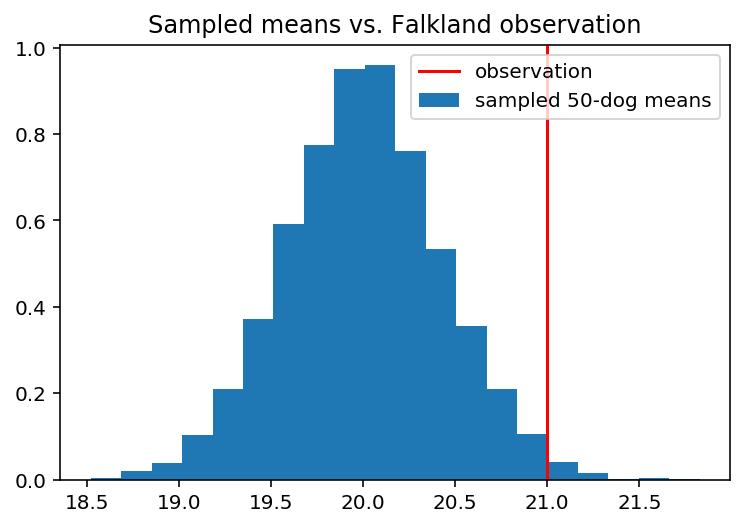

In [12]:
plt.hist(sample_means, bins=20, density=True, label="sampled 50-dog means")
plt.axvline(21.0, c="red", label="observation")
plt.legend()
plt.title("Sampled means vs. Falkland observation")
plt.show()

We can look at the fraction of artificial sample means that are more extreme than our observation:

In [13]:
sum( sample_means>21.0 ) / len(sample_means)

0.01025

In this case, about 1.025% of the time the status quo will generate a 50-dog sample mean with a more extreme value than our observation.

The central limit theorem gives us access to this statistic without having to do any sampling.

According to the CLT, sample means follow a normal distribution with parameters:

$$\mu_M = \mu$$
$$\sigma_M= \frac{\sigma}{\sqrt{n}}$$

In [14]:
mu = 20.0
sigma = 3.0
n = 50

mu_M = mu
sigma_M = sigma/n**0.5

p = 1-scs.norm(loc=mu_M, scale=sigma_M).cdf(21.0)
p

0.009211062727049524

This closely matches the p-value we obtained from sampling, but is more convenient and reliable.

In this case, $p < \alpha$, and we reject the null hypothesis that Falkland Island dogs are the same size as most the rest of the world.

### If you don't have the population variance

Often the experiment will have access to an experimental sample but **not** the population variance. For large samples, it's sufficient to use the sample variance.



In [15]:
np.random.seed(44) #consistency!
dog_weights = scs.norm(loc=20, scale=3).rvs(50)
dog_weights

array([17.74815585, 23.94907197, 23.73842009, 15.18525278, 15.59556896,
       14.85478863, 25.57635107, 20.26276393, 19.84303341, 21.66641491,
       17.10978892, 19.4590356 , 16.44977253, 21.81633776, 17.14504834,
       21.08256818, 23.18183077, 19.64854346, 22.47699455, 16.37055934,
       16.42848915, 20.65961546, 19.36124261, 15.76550257, 18.55105695,
       23.60528625, 17.8825909 , 20.07554406, 18.82661554, 20.57941737,
       21.0478728 , 21.77356515, 21.56122961, 22.47566717, 21.27861052,
       20.58692008, 18.45766347, 10.77893355, 18.81452279, 17.61380245,
       17.89039547, 14.78782197, 22.25242477, 14.40814057, 21.25553295,
       19.29399849, 21.29632152, 22.61087579, 26.02586656, 24.11531272])

In [16]:
sigmahat = dog_weights.std() #this is fine
sigmahat

3.1284563755088937

### That, plus your sample size is tiny

For small samples, however, the sample variance is not a good proxy for the population variance.

In [17]:
dog_weights = scs.norm(loc=20, scale=3).rvs(2)
dog_weights

array([23.17579366, 24.33601269])

In [18]:
sigmabar = dog_weights.std(ddof=1) #this is not fine
sigmabar

0.8203987455942827

Whereas usually one would estimate the sample mean distribution with a normal distribution, $\sigma_M = \frac{\hat{\sigma}}{\sqrt{n}}$, in this case the chance that $\hat{\sigma}$ is much smaller than the population $\sigma$ is relatively high, leading to a high chance of overestimating the statistical signifince of an observation.

It would be prudent to overestimate the spread of sample means around the population mean. This feat is accomplished by modeling the distribution of sample means not with a normal distribution, but with a Student's t-distribution with shape parameter ("degrees of freedom") $\nu=1-n$.

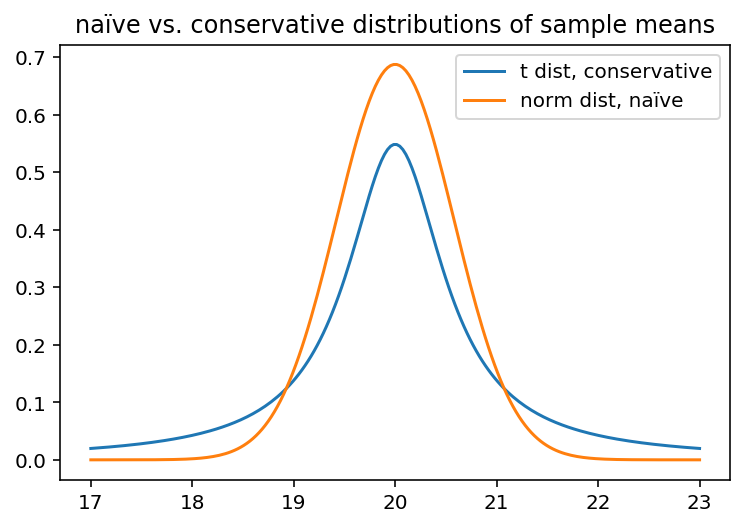

In [19]:
n = len(dog_weights) # only two samples now
df = n-1
sigma_M = sigmabar/n**0.5
# here we've been given the population mean mu_M, but we're having
# to do our best with the sample variance `sigmabar`
naive_p_sample_mean = scs.norm(loc=mu_M, scale=sigma_M)
conservative_p_sample_mean = scs.t(df, loc=mu_M, scale=sigma_M)

sample_means = np.linspace( 17,23, num=200 )
plt.plot( sample_means, conservative_p_sample_mean.pdf(sample_means), label="t dist, conservative" )
plt.plot( sample_means, naive_p_sample_mean.pdf(sample_means), label="norm dist, naïve" )
plt.legend()
plt.title("naïve vs. conservative distributions of sample means")
plt.show()

We're ready to get a p-value for the sample mean for this tiny sample. Here's the sample mean:

In [20]:
xbar = dog_weights.mean()
xbar

23.75590317619272

The vanilla CLT distribution of sample means gives a p-value of **nearly 0.0**. Given the data we have - a population mean and two data points a fair amount above the population mean - we have **almost zero confidence** in the null hypothesis.

In [21]:
1 - naive_p_sample_mean.cdf(xbar)

4.757183535986087e-11

However the more conservative t distribution of sample means gives a p-value of 0.035; a small but non-astronomical 3.5% chance that $H_0$ produced the two samples. This is far more reasonable estimate.

In [22]:
1 - conservative_p_sample_mean.cdf(xbar)

0.04877838947651758

## A quick note on malfeasance

I'm being pretty cavalier with my statistical methods, but the many many significant digits of my p-values -

```0.04877838947651758```

give the impression that what I'm doing is a very precise science.

You might wonder - could someone use the obscurity, authority, subtlety, and arbitrariness of hypothesis testing to manipulate others for fame and fortune? **Absolutely**.

It's called **p-hacking**. [Fivethirtyeight](https://projects.fivethirtyeight.com/p-hacking/) has a great interactive feature on it.

Not everybody engaged in p-hacking is a huckster - it's easy to **fool yourself** into believing in nonsense. Don't do it! Maintain your skepticism, especially of yourself!


## Using `scipy` statistical significance tests

### t-test

Most of this busywork has been packaged up for you in `scipy.stats`. For example, a 1-tail t-test on a very small sample, with a known population mean:

In [23]:
scs.ttest_1samp(dog_weights, 20.0).pvalue/2 #divide by two to convert form 2-tail to 1-tail p-value


0.04877838947651751

The t-test is always appropriate, because for large $n$ it converges on the z-test.

`ttest_ind` tests if two independently drawn samples have the same expected value. For example, if 50 monday grocery shoppers and 120 sunday shoppers have the same average bill size.

In [24]:
np.random.seed(50)
mon = scs.norm(50, 10).rvs(50)
sun = scs.norm(55, 15).rvs(120)

In [25]:
mon.mean(), sun.mean()


(50.93156317533486, 53.35165409794501)

In [26]:
scs.ttest_ind(mon, sun)


Ttest_indResult(statistic=-1.0226066083373466, pvalue=0.3079641419793934)

### chisquare

The `chisquare` test gives the p-value of observing certain frequencies. For example, in a group of 32 randomly selected adults, how often would you expect to see 8 women and 24 men?

In [27]:
n_women = 8
n_men = 24
scs.chisquare([n_women, n_men], f_exp=[16,16])


Power_divergenceResult(statistic=8.0, pvalue=0.004677734981047276)

About 5 times in 1000.

Chisquare can be used for "goodness of fit", to see how well an outcome fits a probability mass function.

Text(0.5, 1.0, 'pmf')

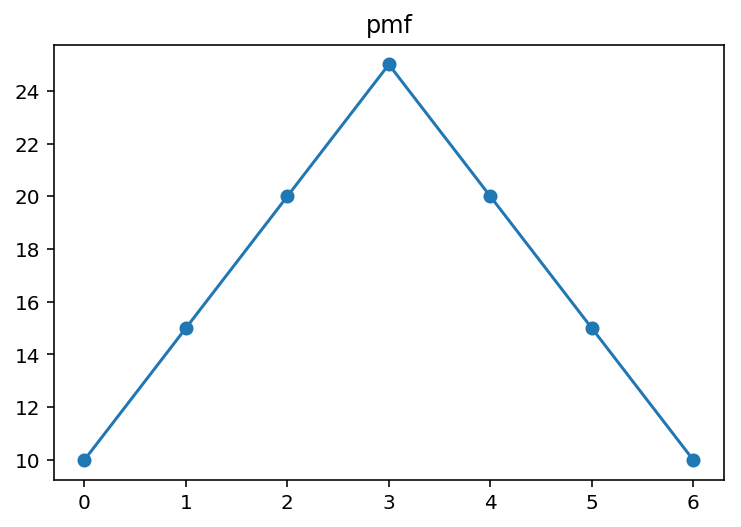

In [28]:
np.random.seed(19)
pmf = np.array([10,15,20,25,20,15,10])
plt.plot(pmf, marker="o")
plt.title("pmf")


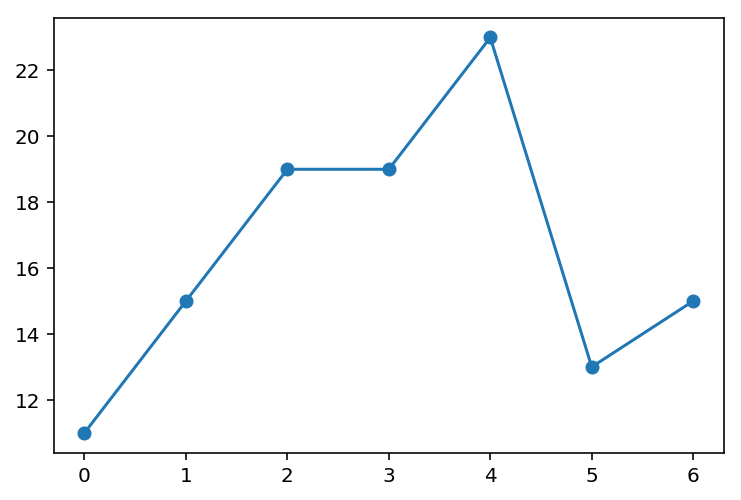

In [29]:
sample = np.bincount( np.random.choice(7, p=pmf/sum(pmf), size=sum(pmf)) )
plt.plot(sample, marker="o")


In [30]:
scs.chisquare( sample, pmf )


Power_divergenceResult(statistic=4.806666666666667, pvalue=0.5688380967350468)

Note the p<0.5, but the sample *was* produced by the pmf. That's the way the cookie crumbles sometimes.

## Multiple testing

#### or: how to accidentally or intentionally fool yourself and others

If data has a p=0.05, that means that if the null hypothesis holds then you should see that data on average one time in twenty. That means if you do it twenty times, it has a 64% chance of occurring.

In [31]:
1 - (1-0.05)**20


0.6415140775914581

If you repeat an experiment enough times, you will *eventually* reject the null hypothesis when you should not have. A $p=1/n$ result on an experiment run $n$ times is meaningless. The p-value result for a rest run twice is half as meaningful, for instance.

For tests run multiple times, choose a more conservative $\alpha$ by a factor of $n$. For example, if you run a test 20 times, the $\alpha_{multiple} = \alpha_{single}/n$. This is known as a **Bonferroni correction**.

### Bad $\alpha$ hygiene: repeated significance checks

You can also get in trouble by stopping an ongoing experiment as soon as the incoming data breaches $\alpha$. This robs your experiment of the possibility of failing during its later stages, artificially inflating the significance of your result.

In general, have good $\alpha$ hygiene. Choose your significance level before your test begins and commit to your methods over the entire planned course of your experiment.